In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [42]:
df=pd.read_csv("C://Users//rakes//Desktop//consulting books//sem 3//coding practise//Car data.csv")

In [43]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [44]:
df.size

105664

In [45]:
df.shape

(8128, 13)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   object 
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [47]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [48]:
df=df.fillna(0)

In [49]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [50]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [51]:
df.iloc[5,8]

20.14

In [52]:
df[df.duplicated(keep = 'last')]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0.00,0,0.00,0,0.0
32,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796 CC,35.00,6.1kgm@ 3000rpm,5.0
33,Hyundai i20 1.2 Asta Dual Tone,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.60,1197 CC,81.83,114.7Nm@ 4000rpm,5.0
34,Maruti Vitara Brezza LDi,2017,650000,16200,Diesel,Individual,Manual,First Owner,24.30,1248 CC,88.50,200Nm@ 1750rpm,5.0
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796 CC,40.30,60Nm@ 3500rpm,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.20,1248 CC,74.00,190Nm@ 2000rpm,5.0
7962,Ford Figo 1.2P Titanium MT,2019,530000,9500,Petrol,Individual,Manual,First Owner,18.16,1196 CC,86.80,112Nm@ 4000rpm,5.0
7963,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461 CC,108.45,240Nm@ 1750rpm,5.0
7964,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248 CC,88.50,200Nm@ 1750rpm,5.0


In [53]:
df = df.drop_duplicates(subset = None, keep ='first')

In [54]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['selling_price']] = StandardScaler().fit_transform(df[['selling_price']])
df[['mileage']] = StandardScaler().fit_transform(df[['mileage']])
df[['max_power']] = StandardScaler().fit_transform(df[['max_power']])


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mileage'] = le.fit_transform(df['mileage'])
df['max_power'] = le.fit_transform(df['max_power'])
df['selling_price'] = le.fit_transform(df['selling_price'])

In [66]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

X=df[['mileage','max_power']]
Y=df[['selling_price']]

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=1)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [69]:
Y_pred = knn.predict(X_test)

In [70]:
Y_pred = knn.predict(X_test)

In [71]:
confusion_matrix(Y_test, Y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.03579676674364896

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

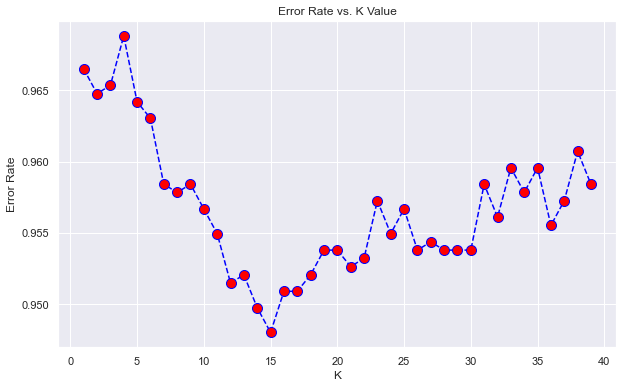

Minimum error:- 0.9480369515011547 at K = 15


In [73]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [74]:
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [75]:
Y_pred = knn.predict(X_test)

In [76]:
accuracy_score(Y_test, Y_pred)

0.05023094688221709

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz


In [79]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"